In [52]:
import matplotlib.pyplot as plt
import math
import os

if not os.path.exists("./img"):
    os.makedirs("./img")

def process():
    dict = {}
    f = open("result.txt")
    lines = f.readlines()
    for line in lines:
        c = line.split(",") 
        #c[0]: method, c[1]: theta, c[2]: input size(bs num) 
        #c[3]: en num, c[4]: cost, c[5]: time

        method = c[0]
        theta = c[1]
        bs_num = c[2]
        
        c[5] = c[5].replace("\n","")
        if theta in dict:
            if method in dict[theta]:
                if bs_num in dict[theta][method]:
                    dict[theta][method][bs_num].append([c[3], c[4], c[5]])
                else:
                    dict[theta][method].update({bs_num: [[c[3], c[4], c[5]]]})
            else:
                dict[theta].update({method: {}})
        else:
            dict.update({theta: {}})
            
    f.close()
    return dict
dict = process()
#print(dict) 

In [53]:
def getStatistic(dict):
    for t in dict:
        for m in dict[t]:
            for bs in dict[t][m]:
                en = 0
                cost = 0
                time = 0
                for value in dict[t][m][bs]:
                    #print(value)
                    en = en + int(value[0])
                    cost = cost + int(float(value[1]))
                    time = time + float(value[2])
                en = math.ceil(en / len(dict[t][m][bs]))
                cost = math.ceil(cost / len(dict[t][m][bs]))
                time = float("{:.2f}".format(time / len(dict[t][m][bs])))
                
                dict[t][m][bs] = [en, cost, time]

getStatistic(dict)
#print(dict)

{'greedy_fine': [2.24, 2.24, 2.24, 2.66, 3.22, 3.08, 4.06, 5.04, 5.6, 6.86, 7.7], 'greedy': [2.24, 2.24, 2.24, 2.66, 3.22, 3.08, 4.06, 5.04, 5.6, 6.86, 7.7], 'greedy_new': [18.62, 21.42, 23.8, 28.84, 33.04, 42.42, 52.22, 73.64, 92.96, 111.72, 130.9], 'greedy_new_fine': [18.62, 21.42, 23.8, 28.84, 33.04, 42.42, 52.22, 73.64, 92.96, 111.72, 130.9], 'greedy_new_avg': [18.62, 21.42, 23.8, 28.84, 33.04, 42.42, 52.22, 73.64, 92.96, 111.72, 130.9], 'greedy_avg': [18.48, 21.42, 23.66, 28.84, 32.9, 42.56, 52.36, 73.5, 92.54, 111.16, 131.6], 'mip': [5.203, 6.083, 6.723, 8.204, 9.405, 12.007, 14.691, 20.776, 25.829, 31.077, 36.602], 'mip_cluster': [5.242, 6.083, 6.723, 8.203, 9.404, 12.006, 14.69, 20.773, 25.866, 31.154, 36.683]}


<Figure size 960x720 with 0 Axes>

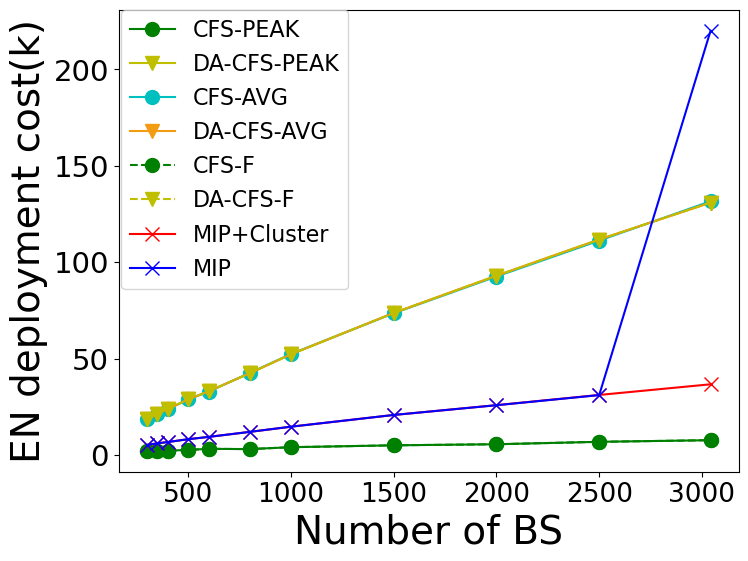

In [54]:
# dict[theta][method][bs_num] ->[en, cost, time]
plt.figure(dpi=150)
font = 28

def plotCost():
    theta = "0.1" # 14.0
    #"200", "250",
    x = [ "300", "350","400","500","600", "800", "1000", "1500", "2000", "2500", "3042"]
#     x = ["800","1000", "1500", "2000", "2500", "2769"]
    #x = ["150", "200", "300", "400","500", "600", "800","1000", "1500", "2000", "2500", "2769"]
    #x = ["150", "200", "250", "300", "350","400","450","500"]
    plot_dict = {}
#     random = []
#     greedy = []
#     greedy_new = []
    
    for method in dict[theta]:
        for i in x:
            if method in plot_dict:
                if i in dict[theta][method]:
                    value = dict[theta][method][i][1]
                    plot_dict[method].append(value/1000)
            else:
                if method in dict[theta]:
                    value = dict[theta][method][i][1]
                    plot_dict.update({method:[value/1000]})
    
    
    print(plot_dict)
    plot_dict['mip'][-1] = 220
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Number of BS', fontsize=font)
    plt.ylabel(r'EN deployment cost(k)', fontsize=font)
    
    plt.xticks(fontsize=19)
    plt.yticks(fontsize=21)

    n = [int(i) for i in x]
    #markersize=15, linewidth = 3,
    #plt.plot(n, plot_dict['random'], "y.-",  label="Random")
    plt.plot(n, plot_dict['greedy'], "go-",  label="CFS-PEAK", markersize=10)
    plt.plot(n, plot_dict['greedy_new'], "yv-",label="DA-CFS-PEAK", markersize=10)
    plt.plot(n, plot_dict['greedy_avg'], "co-",label="CFS-AVG", markersize=10)
    plt.plot(n, plot_dict['greedy_new_avg'], "v-", color="#F39C12", label="DA-CFS-AVG", markersize=10)
    plt.plot(n, plot_dict['greedy_fine'], "go--",label="CFS-F", markersize=10)
    plt.plot(n, plot_dict['greedy_new_fine'], "yv--",label="DA-CFS-F", markersize=10)
    plt.plot(n, plot_dict['mip_cluster'], "rx-",label="MIP+Cluster", markersize=10)
    
    plt.plot(n[0:11], plot_dict['mip'][0:11], "bx-",label="MIP", markersize=10)

#     plt.plot(n[0:len(plot_dict['mip'])], plot_dict['mip'], "mx-",label="MIP", markersize=10)
    
    
    plt.legend(bbox_to_anchor=(0.37, 1), loc=1, borderaxespad=0., fontsize = 16)

    #plt.grid(True)

    plt.savefig('./img/cost.png', bbox_inches = 'tight')
    
plotCost()

{'greedy_fine': [2.24, 2.24, 2.24, 2.66, 3.22, 3.08, 4.06, 5.04, 5.6, 6.86, 7.7], 'greedy': [2.24, 2.24, 2.24, 2.66, 3.22, 3.08, 4.06, 5.04, 5.6, 6.86, 7.7], 'greedy_new': [18.62, 21.42, 23.8, 28.84, 33.04, 42.42, 52.22, 73.64, 92.96, 111.72, 130.9], 'greedy_new_fine': [18.62, 21.42, 23.8, 28.84, 33.04, 42.42, 52.22, 73.64, 92.96, 111.72, 130.9], 'greedy_new_avg': [18.62, 21.42, 23.8, 28.84, 33.04, 42.42, 52.22, 73.64, 92.96, 111.72, 130.9], 'greedy_avg': [18.48, 21.42, 23.66, 28.84, 32.9, 42.56, 52.36, 73.5, 92.54, 111.16, 131.6], 'mip': [5.203, 6.083, 6.723, 8.204, 9.405, 12.007, 14.691, 20.776, 25.829, 31.077, 36.602], 'mip_cluster': [5.242, 6.083, 6.723, 8.203, 9.404, 12.006, 14.69, 20.773, 25.866, 31.154, 36.683]}


<Figure size 960x720 with 0 Axes>

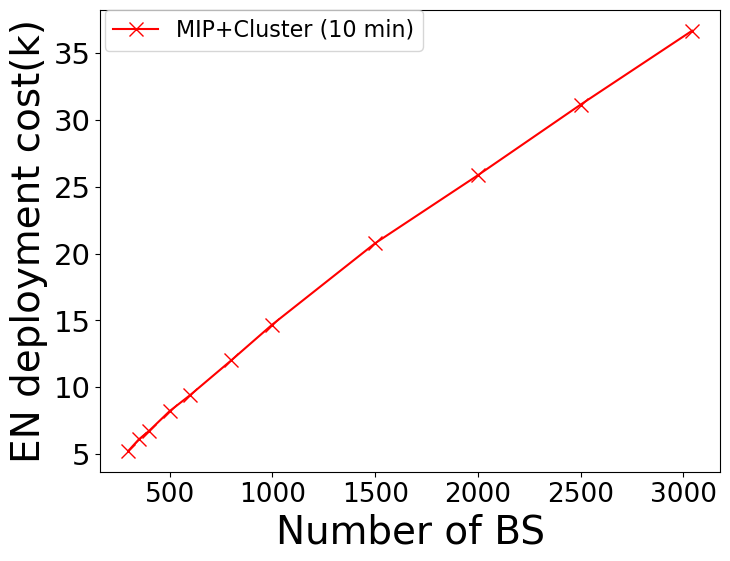

In [55]:
# dict[theta][method][bs_num] ->[en, cost, time]
plt.figure(dpi=150)

def plotCostMIP():
    theta = "0.1" # 14.0
    #"200", "250",
    x = [ "300", "350","400","500","600", "800", "1000", "1500", "2000", "2500", "3042"]
#     x = ["800","1000", "1500", "2000", "2500", "2769"]
    #x = ["150", "200", "300", "400","500", "600", "800","1000", "1500", "2000", "2500", "2769"]
    #x = ["150", "200", "250", "300", "350","400","450","500"]
    plot_dict = {}
#     random = []
#     greedy = []
#     greedy_new = []
    
    for method in dict[theta]:
        for i in x:
            if method in plot_dict:
                if i in dict[theta][method]:
                    value = dict[theta][method][i][1]
                    plot_dict[method].append(value/1000)
            else:
                if method in dict[theta]:
                    value = dict[theta][method][i][1]
                    plot_dict.update({method:[value/1000]})
            
    print(plot_dict)
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Number of BS', fontsize=font)
    plt.ylabel(r'EN deployment cost(k)', fontsize=font)
    
    plt.xticks(fontsize=19)
    plt.yticks(fontsize=21)

    n = [int(i) for i in x]
    #markersize=15, linewidth = 3,
    #plt.plot(n, plot_dict['random'], "y.-",  label="Random")
#     plt.plot(n, plot_dict['greedy'], "go-",  label="CFS-PEAK", markersize=10)
#     plt.plot(n, plot_dict['greedy_new'], "yv-",label="DA-CFS-PEAK", markersize=10)
#     plt.plot(n, plot_dict['greedy_avg'], "co-",label="CFS-AVG", markersize=10)
#     plt.plot(n, plot_dict['greedy_new_avg'], "v-", color="#F39C12", label="DA-CFS-AVG", markersize=10)
#     plt.plot(n, plot_dict['greedy_fine'], "go-.",label="CFS-F", markersize=10)
#     plt.plot(n, plot_dict['greedy_new_fine'], "yv-.",label="DA-CFS-F", markersize=10)
    plt.plot(n, plot_dict['mip_cluster'], "rx-",label="MIP+Cluster (10 min)", markersize=10)
    # plt.plot(n, plot_dict['mip_cluster_2'], "mX--",label="MIP+Cluster (1h)", markersize=10)
    

#     plt.plot(n[0:len(plot_dict['mip'])], plot_dict['mip'], "mx-",label="MIP", markersize=10)
    
    
    plt.legend(bbox_to_anchor=(0.52, 1), loc=1, borderaxespad=0., fontsize = 16)

    #plt.grid(True)
    plt.savefig('./img/costMIP.png', bbox_inches = 'tight')
    
plotCostMIP()

{'greedy_fine': [2.24, 2.24, 2.24, 2.52, 2.66, 3.08, 4.06, 5.04, 5.6, 6.86, 7.7], 'greedy': [2.24, 2.24, 2.24, 2.52, 2.66, 3.08, 4.06, 5.04, 5.6, 6.86, 7.7], 'greedy_new': [18.62, 21.42, 23.8, 26.74, 28.84, 42.42, 52.22, 73.64, 92.96, 111.72, 130.9], 'greedy_new_fine': [18.62, 21.42, 23.8, 26.74, 28.84, 42.42, 52.22, 73.64, 92.96, 111.72, 130.9], 'greedy_new_avg': [18.62, 21.42, 23.8, 26.74, 28.84, 42.42, 52.22, 73.64, 92.96, 111.72, 130.9], 'greedy_avg': [18.48, 21.42, 23.66, 26.6, 28.84, 42.56, 52.36, 73.5, 92.54, 111.16, 131.6], 'mip': [5.203, 6.083, 6.723, 7.524, 8.204, 12.007, 14.691, 20.776, 25.829, 31.077, 36.602], 'mip_cluster': [5.242, 6.083, 6.723, 7.523, 8.203, 12.006, 14.69, 20.773, 25.866, 31.154, 36.683]}


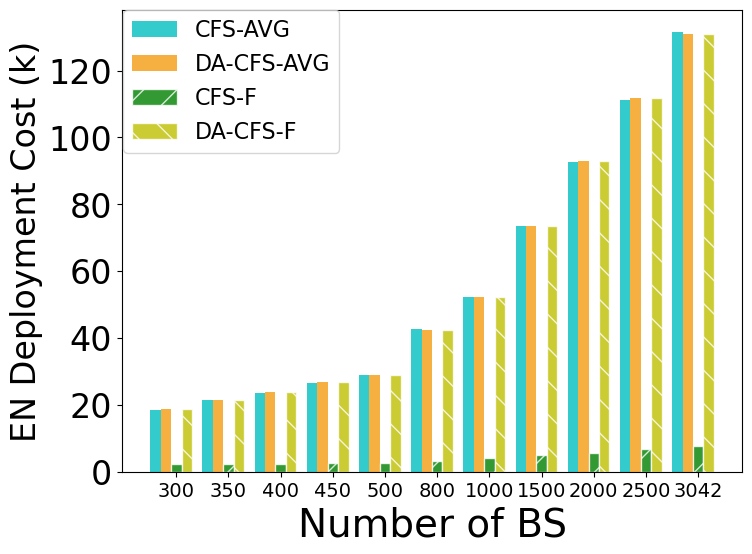

In [56]:
def plotAvg():
    theta = "0.1"
#     x = ["200", "500", "1000", "1500", "2000", "2500", "2769"]
    x = [ "300", "350","400","450","500","800", "1000", "1500", "2000", "2500", "3042"]
    plot_dict = {}
    
    for method in dict[theta]:
        for i in x:
            if method in plot_dict:
                if i in dict[theta][method]:
                    value = dict[theta][method][i][1]
                    plot_dict[method].append(value/1000)
                else:
                    plot_dict[method].append(0)
            else:
                value = dict[theta][method][i][1]
                plot_dict.update({method:[value/1000]})
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Number of BS', fontsize=font)
    plt.ylabel(r'EN Deployment Cost (k)', fontsize=24)

    r = range(1, len(plot_dict['greedy'])+1)

    p_greedy_avg = [i - 0.4 for i in r]
    p_greedy_new_avg = [i - 0.2 for i in r]
    p_greedy_fine = [i for i in r]
    p_greedy_new_fine = [i + 0.2 for i in r]
    #print(p_random)
                 
    bar1 = plt.bar(p_greedy_avg,plot_dict['greedy_avg'],width = 0.2, alpha = 0.8,color = 'c', label = 'CFS-AVG') 
    bar2 = plt.bar(p_greedy_new_avg,plot_dict['greedy_new_avg'],width = 0.2, alpha = 0.8,color = '#F39C12', label = 'DA-CFS-AVG') 
    bar3 = plt.bar(p_greedy_fine,plot_dict['greedy_fine'],width = 0.2, alpha = 0.8,color = 'g',hatch = '/', edgecolor='w', label = 'CFS-F') 
    bar4 = plt.bar(p_greedy_new_fine,plot_dict['greedy_new_fine'],width = 0.2, alpha = 0.8,color = 'y', hatch = '\\', edgecolor='w',label = 'DA-CFS-F') 
    
    #n = [int(i)/100 for i in x]
    
    plt.yticks(fontsize=24)
    plt.xticks(r,x, fontsize=14) 
    plt.legend(bbox_to_anchor=(0.35, 1), loc=1, borderaxespad=0., fontsize=16)

    plt.savefig('./img/cost_avg.png', bbox_inches = 'tight')
    #plt.grid(True)
    
plotAvg()

{'greedy_fine': [0.48, 0.86, 1.19, 1.62, 1.91, 3.23, 3.51, 4.09, 7.36, 12.58, 18.49], 'greedy': [0.02, 0.04, 0.08, 0.12, 0.18, 0.28, 0.5, 1.26, 2.2, 3.29, 5.01], 'greedy_new': [0.14, 0.4, 0.79, 1.44, 2.26, 4.85, 9.22, 25.55, 52.47, 91.03, 150.62], 'greedy_new_fine': [0.17, 0.44, 0.87, 1.55, 2.4, 5.06, 9.5, 26.01, 53.18, 92.09, 151.97], 'greedy_new_avg': [0.2, 0.56, 1.16, 2.07, 3.32, 7.09, 13.23, 35.31, 69.47, 124.33, 202.05], 'greedy_avg': [0.19, 0.52, 1.09, 2.1, 3.14, 6.88, 12.74, 34.38, 70.72, 122.78, 203.34], 'mip': [0.65, 2.14, 3.71, 7.43, 11.15, 20.32, 37.2, 99.48, 209.26, 558.62, 644.3], 'mip_cluster': [0.65, 1.58, 2.35, 3.42, 3.58, 6.24, 10.76, 13.97, 21.44, 34.98, 45.98]}


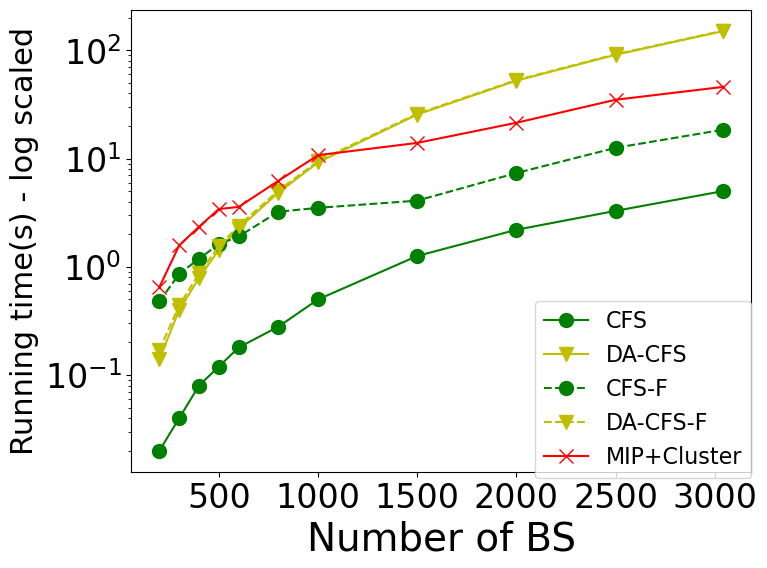

In [57]:
def plotTimeLine():
    theta = "0.1"
    x = ["200", "300", "400","500","600", "800", "1000", "1500", "2000", "2500", "3042"]
    plot_dict = {}
    
    for method in dict[theta]:
        for i in x:
            if method in plot_dict:
                if i in dict[theta][method]:
                    value = dict[theta][method][i][2]
                    plot_dict[method].append(value)
            else:
                if method in dict[theta]:
                    value = dict[theta][method][i][2]
                    plot_dict.update({method:[value]})
            
    print(plot_dict)
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    plt.yscale("log")
    
    plt.xlabel(r'Number of BS', fontsize=font)
    plt.ylabel(r'Running time(s) - log scaled', fontsize=22)
#     plt.ylabel(r'Algorithm running time(s) when $\theta$ = ' + theta, fontsize=18)

    n = [int(i) for i in x]
    
#     plt.plot(n, plot_dict['random'], "r.-", label="Random")
    plt.plot(n, plot_dict['greedy'], "go-", label="CFS", markersize=10)
    plt.plot(n, plot_dict['greedy_new'], "yv-", label="DA-CFS", markersize=10)
#     plt.plot(n[0:len(plot_dict['mip'])], plot_dict['mip'], "yo-", label="MIP")
    plt.plot(n, plot_dict['greedy_fine'], "go--", label="CFS-F", markersize=10)
    plt.plot(n, plot_dict['greedy_new_fine'], "yv--", label="DA-CFS-F", markersize=10)
    plt.plot(n, plot_dict['mip_cluster'], "rx-", label="MIP+Cluster", markersize=10)
    
    plt.yticks(fontsize=24)
    plt.xticks(fontsize=24) 
    
    plt.legend(bbox_to_anchor=(1, 0.37), loc=1, borderaxespad=0., fontsize = 16)

    #plt.grid(True)
    fig.savefig('./img/time_line.png', bbox_inches = 'tight')
    
plotTimeLine()

{'greedy_fine': [13, 16, 16, 19, 23, 22, 29, 36, 40, 49, 55], 'greedy': [13, 16, 16, 19, 23, 22, 29, 36, 40, 49, 55], 'greedy_new': [95, 133, 170, 206, 236, 303, 373, 526, 664, 798, 935], 'greedy_new_fine': [95, 133, 170, 206, 236, 303, 373, 526, 664, 798, 935], 'greedy_new_avg': [95, 133, 170, 206, 236, 303, 373, 526, 664, 798, 935], 'greedy_avg': [94, 132, 169, 206, 235, 304, 374, 525, 661, 794, 940], 'mip': [94, 130, 169, 205, 237, 300, 368, 519, 647, 776, 915], 'mip_cluster': [94, 131, 168, 206, 236, 302, 368, 519, 647, 778, 922]}


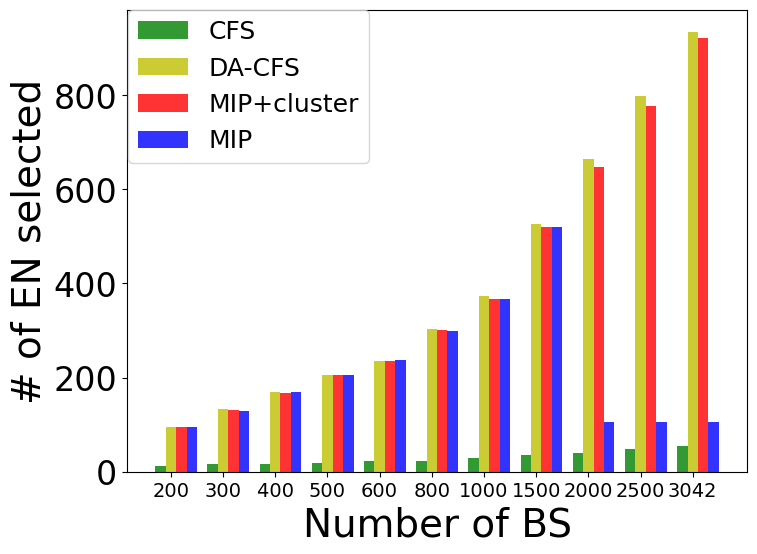

In [58]:
def plotENBar():
    theta = "0.1" #14
    x = ["200", "300", "400","500","600", "800", "1000", "1500", "2000", "2500", "3042"]
    #x = ["200", "500", "1000", "1500", "2000", "2500", "2768"]
    plot_dict = {}
    
    for method in dict[theta]:
        for i in x:
            if method in plot_dict:
                if i in dict[theta][method]:
                    plot_dict[method].append(dict[theta][method][i][0])
                else:
                    plot_dict[method].append(0)
            else:
                plot_dict.update({method:[dict[theta][method][i][0]]})
            
    print(plot_dict)
    plot_dict['mip'][-1] = 105
    plot_dict['mip'][-2] = 105
    plot_dict['mip'][-3] = 105
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Number of BS', fontsize=font)
    plt.ylabel(r'# of EN selected', fontsize=font)

    r = range(1, len(plot_dict['greedy'])+1)
    p_greedy = [i - 0.2 for i in r]
    p_greedy_new = [i for i in r]
    p_mip = [i + 0.2 for i in r]
    p_mip_cluster = [i + 0.4 for i in r]
    #print(p_random)
    
#     bar1 = plt.bar(p_random, height = plot_dict['random'], width = 0.2, alpha = 0.8, color = 'y',label = 'Random')                 
    bar2 = plt.bar(p_greedy,plot_dict['greedy'],width = 0.2, alpha = 0.8,color = 'g',label = 'CFS') 
    bar3 = plt.bar(p_greedy_new,plot_dict['greedy_new'],width = 0.2, alpha = 0.8,color = 'y',label = 'DA-CFS') 
    bar3 = plt.bar(p_mip,plot_dict['mip_cluster'],width = 0.2, alpha = 0.8,color = 'r',label = 'MIP+cluster')
    bar4 = plt.bar(p_mip_cluster[0:11],plot_dict['mip'][0:11],width = 0.2, alpha = 0.8,color = 'b',label = 'MIP')
    
    plt.xticks(r, x, fontsize=14)
    plt.yticks(fontsize=24)
    
    plt.legend(bbox_to_anchor=(0.39, 1), loc=1, borderaxespad=0., fontsize=18)
    
    #plt.grid(True)
    plt.savefig('./img/en.png', bbox_inches = 'tight')
    
plotENBar()


{'greedy_fine': [55, 33, 27, 24], 'greedy': [55, 33, 27, 24], 'greedy_new': [935, 635, 457, 363], 'greedy_new_fine': [935, 635, 457, 363], 'greedy_new_avg': [935, 635, 457, 363], 'greedy_avg': [940, 636, 459, 363], 'mip': [915, 676, 3038, 3040], 'mip_cluster': [922, 607, 446, 336]}


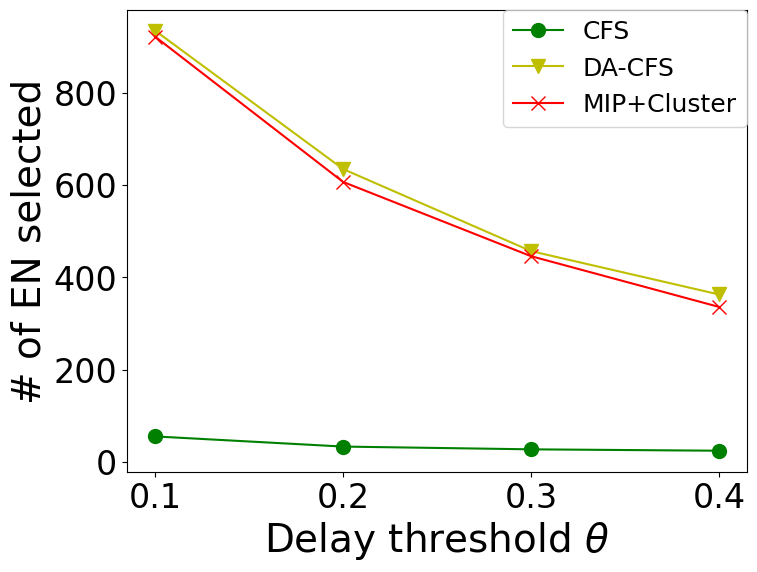

In [59]:
# dict[theta][method][bs_num] ->[en, cost, time]
def plotThetaWithEN():
    x = []
    plot_dict = {}
    bs = "3042"
    markerSize = 10
    
    for theta in dict:
        x.append(theta)
        for method in dict[theta]:
            if method in plot_dict:
                if bs in dict[theta][method]:
                    plot_dict[method].append(dict[theta][method][bs][0])
            else:
                if bs in dict[theta][method]:
                    plot_dict.update({method:[dict[theta][method][bs][0]]})
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Delay threshold $\theta$', fontsize=font)
    plt.ylabel(r'# of EN selected', fontsize=font)
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
#     plt.plot(x, plot_dict['random'], "y.-", label="Random")
    plt.plot(x, plot_dict['greedy'], "go-", label="CFS", markersize=markerSize)
    plt.plot(x, plot_dict['greedy_new'], "yv-", label="DA-CFS", markersize=markerSize)
    plt.plot(x, plot_dict['mip_cluster'], "rx-", label="MIP+Cluster", markersize=markerSize)
#     plt.plot(x, plot_dict['mip'], "ro-", label="MIP")
    
    
    plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., fontsize=18)
    
    plt.savefig('./img/theta_en.png', bbox_inches = 'tight')
    
plotThetaWithEN()


{'greedy_fine': [55, 33, 27, 24], 'greedy': [55, 33, 27, 24], 'greedy_new': [935, 635, 457, 363], 'greedy_new_fine': [935, 635, 457, 363], 'greedy_new_avg': [935, 635, 457, 363], 'greedy_avg': [940, 636, 459, 363], 'mip': [915, 676, 3038, 3040], 'mip_cluster': [922, 607, 446, 336]}


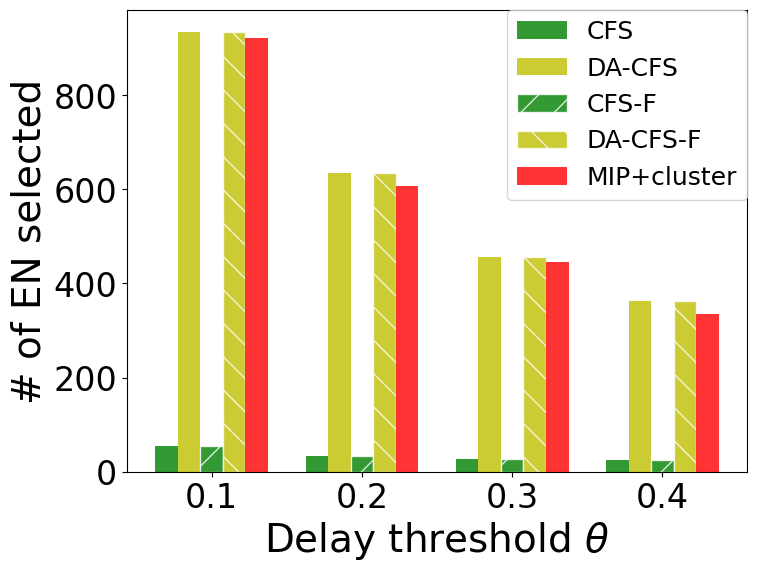

In [60]:
def plotThetaWithENBar():
    x = []
    plot_dict = {}
    bs = "3042"
    markerSize = 10
    
    for theta in dict:
        x.append(theta)
        for method in dict[theta]:
            if method in plot_dict:
                if bs in dict[theta][method]:
                    plot_dict[method].append(dict[theta][method][bs][0])
            else:
                if bs in dict[theta][method]:
                    plot_dict.update({method:[dict[theta][method][bs][0]]})
            
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Delay threshold $\theta$', fontsize=font)
    plt.ylabel(r'# of EN selected', fontsize=font)
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    r = range(1, len(plot_dict['greedy']) + 1)
    p_greedy = [i - 0.3 for i in r]
    p_greedy_new = [i - 0.15 for i in r]
    
    p_greedy_fine = [i for i in r]
    p_greedy_new_fine = [i + 0.15 for i in r]
    
    p_mip_cluster = [i + 0.3 for i in r]
    
    
    
    bar1 = plt.bar(p_greedy, plot_dict['greedy'], width=0.15, alpha=0.8, color='g', label='CFS')
    bar3 = plt.bar(p_greedy_new, plot_dict['greedy_new'], width=0.15, alpha=0.8, color='y', label='DA-CFS')
    bar2 = plt.bar(p_greedy_fine, plot_dict['greedy_fine'], width=0.15, alpha=0.8, hatch = '/', edgecolor='w', color='g', label='CFS-F')
    bar4 = plt.bar(p_greedy_new_fine, plot_dict['greedy_new_fine'], width=0.15, alpha=0.8, hatch = '\\', edgecolor='w', color='y', label='DA-CFS-F')
    bar5 = plt.bar(p_mip_cluster, plot_dict['mip_cluster'], width=0.15, alpha=0.8, color='r', label='MIP+cluster')
    # bar4 = plt.bar(p_mip_cluster[0:11], plot_dict['mip'][0:11], width=0.2, alpha=0.8, color='b', label='MIP')
    
    plt.xticks(r, x)
    plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., fontsize=18)
    
    plt.savefig('./img/theta_en_bar.png', bbox_inches = 'tight')
    
plotThetaWithENBar()

{'greedy_fine': [7.7, 4.62, 3.78, 3.36], 'greedy': [7.7, 4.62, 3.78, 3.36], 'greedy_new': [130.9, 88.9, 63.98, 50.82], 'greedy_new_fine': [130.9, 88.9, 63.98, 50.82], 'greedy_new_avg': [130.9, 88.9, 63.98, 50.82], 'greedy_avg': [131.6, 89.04, 64.26, 50.82], 'mip': [36.602, 27.061, 121.526, 121.604], 'mip_cluster': [36.683, 24.059, 17.258, 13.372]}


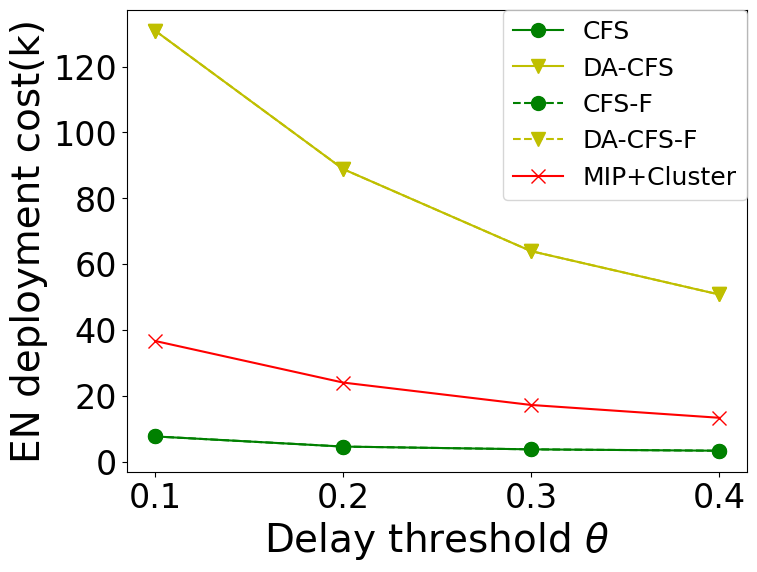

In [61]:
def plotThetaWithCost():
    x = []
    plot_dict = {}
    bs = "3042"
    markerSize = 10
    
    for theta in dict:
        x.append(theta)
        for method in dict[theta]:
            if method in plot_dict:
                if bs in dict[theta][method]:
                    value = dict[theta][method][bs][1]
                    plot_dict[method].append(value/1000)
            else:
                if bs in dict[theta][method]:
                    value = dict[theta][method][bs][1]
                    plot_dict.update({method:[value/1000]})
            
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.xlabel(r'Delay threshold $\theta$', fontsize=font)
    plt.ylabel(r'EN deployment cost(k)', fontsize=font)
    
    #i - 0.2 for i in r
#     plt.plot(x, plot_dict['random'], "y.-", label="Random")
    plt.plot(x, plot_dict['greedy'], "go-", label="CFS", markersize = markerSize)
    plt.plot(x, plot_dict['greedy_new'], "yv-", label="DA-CFS", markersize = markerSize)
    plt.plot(x, plot_dict['greedy_fine'], "go--", label="CFS-F", markersize = markerSize)
    plt.plot(x, plot_dict['greedy_new_fine'], "yv--", label="DA-CFS-F", markersize = markerSize)
    plt.plot(x, plot_dict['mip_cluster'], "rx-", label="MIP+Cluster", markersize = markerSize)
#     plt.plot(x, plot_dict['mip'], "ro-", label="MIP")
    
    
    plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., fontsize=18)
    plt.savefig('./img/theta_cost.png', bbox_inches = 'tight')
    
plotThetaWithCost()


{'greedy_fine': [18.49, 65.04, 65.23, 65.77], 'greedy': [5.01, 4.63, 4.75, 5.07], 'greedy_new': [150.62, 66.29, 35.42, 25.11], 'greedy_new_fine': [151.97, 68.25, 38.21, 28.45], 'greedy_new_avg': [202.05, 154.39, 151.9, 158.78], 'greedy_avg': [203.34, 150.9, 147.31, 157.08], 'mip': [644.3, 640.31, 641.59, 650.46], 'mip_cluster': [45.98, 81.52, 98.84, 119.6]}


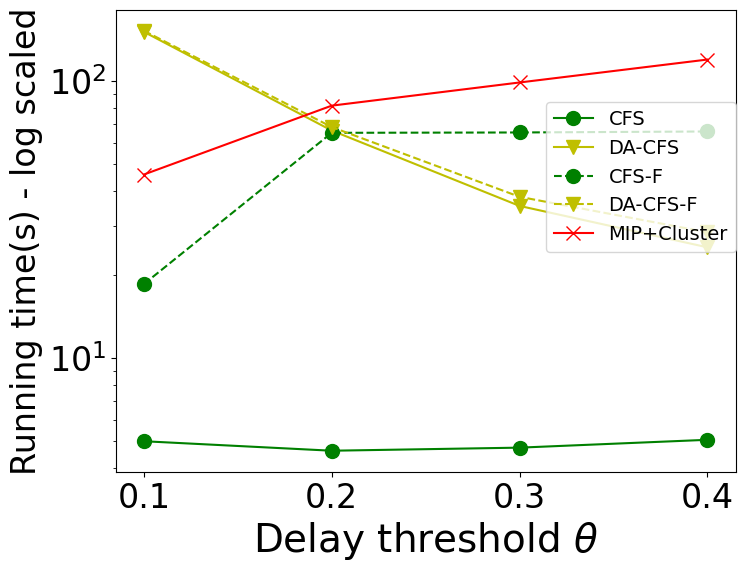

In [62]:
def plotThetaWithTimeLine():
    x = []
    plot_dict = {}
    bs = "3042"
    markerSize = 10
    
    for theta in dict:
        x.append(theta)
        for method in dict[theta]:
            if bs in dict[theta][method]:
                if method in plot_dict:
                    plot_dict[method].append(dict[theta][method][bs][2])
                else:
                    plot_dict.update({method:[dict[theta][method][bs][2]]})
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.yscale("log")
    plt.xlabel(r'Delay threshold $\theta$', fontsize=font)
    plt.ylabel(r'Running time(s) - log scaled', fontsize=24)
    
    #plt.plot(x, plot_dict['random'], "y.-", label="Random")
    plt.plot(x, plot_dict['greedy'], "go-", label="CFS", markersize=markerSize)
    plt.plot(x, plot_dict['greedy_new'], "yv-", label="DA-CFS", markersize=markerSize)
    plt.plot(x, plot_dict['greedy_fine'], "go--", label="CFS-F", markersize = markerSize)
    plt.plot(x, plot_dict['greedy_new_fine'], "yv--", label="DA-CFS-F", markersize = markerSize)
    plt.plot(x, plot_dict['mip_cluster'], "rx-", label="MIP+Cluster", markersize=markerSize)
#     plt.plot(x, plot_dict['mip'], "ro-", label="MIP")
    
    
    plt.legend(bbox_to_anchor=(1, 0.8), loc=1, borderaxespad=0., fontsize=14)
    plt.savefig('./img/theta_time.png', bbox_inches = 'tight')
    
plotThetaWithTimeLine()

In [63]:
def plot_tau():
    x = []
    en = []
    cost = []
    
    f = open("result_tau.txt")
    lines = f.readlines()

    count = 1
    for line in lines:
        if(count % 2 == 0):
            c = line.split(",") 
            #c[0]: tau, c[1]: en, c[2]: cost
            x.append(c[0])
            en.append(int(c[1]))
            cost.append(int(c[2].replace("\n",""))/1000)          
        count = count + 1
    f.close()
    
    print(x)
    print(en)
    print(cost)
    
    fig = plt.figure(figsize=(8, 6))
    
    ax = fig.add_subplot(111)
    line_cost = ax.plot(x, cost, "r.-", label="Cost")
    ax.set_ylim(150, 400)
    
    ax2 = ax.twinx()
    #line_en = ax2.plot(x, en, "ro-", label="EN #")
    r = range(1, len(en)+1)
    p= [i - 1 for i in r]
    bar_en = ax2.bar(p, en,width = 0.2, alpha = 0.8,color = 'g',label = 'EN #')
    
    ax2.set_ylim(160, 170)
    
#     ax.set_xticks(fontsize=font)
#     ax.set_yticks(fontsize=font)
#     ax2.set_xticks(fontsize=font)

    ax.set_xlabel(r'candidate number threshold $\tau$', fontsize=font)
    ax.set_ylabel(r'Cost(k)', fontsize=font)
    ax2.set_ylabel(r'# of EN', fontsize=font)
    

    
    plt.legend(handles = [line_cost[0], bar_en], bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., fontsize=font)
    
    #plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
    plt.savefig('./img/tau.png', bbox_inches = 'tight')
    
plot_tau()

FileNotFoundError: [Errno 2] No such file or directory: 'result_tau.txt'

In [ ]:
import matplotlib.pyplot as plt
def process_distribution():
    dict = {}
    f = open("distribution.txt")
    lines = f.readlines()

    for line in lines[0:]:
        c = line.split(",") 
        #c[0]: name, c[1]: theta, c[2]: bs num, c[3]: trans delay, c[4]: comp delay
        method = c[0]
        theta = c[1]
        bs_num = c[2]
        trans = float(c[3])
        comp = float(c[4].replace("\n",""))
        
        if theta in dict:
            if method in dict[theta]:
                if bs_num in dict[theta][method]:
                    dict[theta][method][bs_num].append([trans, comp])
                else:
                    dict[theta][method].update({bs_num: [[trans, comp]]})
            else:
                dict[theta].update({method: {}})
        else:
            dict.update({theta: {}})
    f.close()
    #print(dict)
    return dict

    
dict = process_distribution()

In [ ]:
def plot_dist_bar():
    theta = "0.1"
    method = "greedy"
    bs_num = "2769"
    
    x = []
    y_random = []
    y_greedy = []
    y_greedy_new = []
    
    for i in range(int(float(theta))):
        x.append(i + 1)
        y_random.append(0)
        y_greedy.append(0)
        y_greedy_new.append(0)
         
#     for method in dict[theta]
    for item in dict[theta]["random"][bs_num][0:]:
        cate = int(item[0]%14)
        y_random[cate] = y_random[cate] + 1
        
    for item in dict[theta]["greedy"][bs_num][0:]:
        cate = int(item[0]%14)
        y_greedy[cate] = y_greedy[cate] + 1
        
    for item in dict[theta]["greedy_new"][bs_num][0:]:
        cate = int(item[0]%14)
        y_greedy_new[cate] = y_greedy_new[cate] + 1

    print(y_random)
    print(y_greedy)
    print(y_greedy_new)
    
    r = range(1, len(x)+1)
    p = [i for i in r]
    
 #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Transmission Delay')
    plt.ylabel(r'# of BS on $\theta$ = 10')

    r = range(1, len(x)+1)
    p_random = [i - 0.2 for i in r]
    p_greedy = [i for i in r]
    p_greedy_new = [i + 0.2 for i in r]
    #p_mip = [i + 0.4 for i in r]
    #print(p_random)
    
#     bar1 = plt.bar(p_random, height = y_random, width = 0.2, alpha = 0.8, color = 'y',label = 'Random')                 
#     bar2 = plt.bar(p_greedy,y_greedy,width = 0.2, alpha = 0.8,color = 'g',label = 'CFS') 
#     bar3 = plt.bar(p_greedy_new,y_greedy_new,width = 0.2, alpha = 0.8,color = 'b',label = 'DA-CFS') 

    bar1 = plt.bar(p_greedy, height = y_random, width = 0.6, alpha = 0.6, color = 'y',label = 'Random')                 
    bar2 = plt.bar(p_greedy,y_greedy,width = 0.6, alpha = 0.6,color = 'g',label = 'CFS') 
    bar3 = plt.bar(p_greedy,y_greedy_new,width = 0.6, alpha = 0.6,color = 'b',label = 'DA-CFS') 
    #bar4 = plt.bar(p_mip,plot_dict['mip'],width = 0.2, alpha = 0.8,color = 'r',label = 'MIP')
    plt.xticks(r,x) 

    plt.legend(bbox_to_anchor=(0.175, 1), loc=1, borderaxespad=0.)
    plt.savefig('./img/distribution.png', bbox_inches = 'tight')

    #plt.grid(True)
    plt.show()

plot_dist_bar()

In [ ]:
def plot_dist_line():
    theta = "0.1"
    method = "greedy"
    bs_num = "2769"
    
    x = []
    y_random = []
    y_greedy = []
    y_greedy_new = []
    
    for i in range(int(float(theta))):
        x.append(i + 1)
        y_random.append(0)
        y_greedy.append(0)
        y_greedy_new.append(0)
         
#     for method in dict[theta]
    for item in dict[theta]["random"][bs_num][0:]:
        cate = int(item[0]%14)
        y_random[cate] = y_random[cate] + 1
        
    for item in dict[theta]["greedy"][bs_num][0:]:
        cate = int(item[0]%14)
        y_greedy[cate] = y_greedy[cate] + 1
        
    for item in dict[theta]["greedy_new"][bs_num][0:]:
        cate = int(item[0]%14)
        y_greedy_new[cate] = y_greedy_new[cate] + 1

    print(y_random)
    print(y_greedy)
    print(y_greedy_new)
    
    r = range(1, len(x)+1)
    p = [i for i in r]

    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Transmission Delay')
    plt.ylabel(r'# of BS on $\theta$ = 10')
    
    #i - 0.2 for i in r
    plt.plot(x, y_random, "y.-", label="Random")
    plt.plot(x, y_greedy, "rx-", label="CFS")
    plt.plot(x, y_greedy_new, "bv-", label="DA-CFS")
    
    plt.legend(bbox_to_anchor=(0.175, 1), loc=1, borderaxespad=0.)

    plt.savefig('./img/distribution.png', bbox_inches = 'tight')

    #plt.grid(True)
    plt.show()
    
#plot_dist_line()

In [ ]:

def plot_dist_his_random():
    theta = "22.0"
    method = "random"
    bs_num = "2769"
    
    data = [(int(i[0])%14)/10 for i in dict[theta]["random"][bs_num]]
    #print(data[0:50])
    
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.xlabel(r'Proportion of transmission delay', fontsize=font)
    plt.ylabel(r'# of BS', fontsize=font)
    
    plt.hist(data, bins = 10,align='mid',range=[0, 1],facecolor='y', edgecolor='black',alpha=0.7)
    plt.savefig('./img/dist_random.png', bbox_inches = 'tight')
    plt.show()
    
plot_dist_his_random()

In [ ]:
def plot_dist_his_cfs():
    theta = "0.1"
    method = "greedy"
    bs_num = "2769"
    
    data = [(int(i[0])%14)/15 for i in dict[theta][method][bs_num]]
    #print(data[0:50])
    
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.xlabel(r' Proportion of transmission delay', fontsize=font)
    plt.ylabel(r'# of BS', fontsize=font)
    plt.ylim(0,400)
    
    plt.hist(data, bins = 15,align='mid',range=[0, 1],facecolor='g', edgecolor='black',alpha=0.7)
    plt.savefig('./img/dist_cfs.png', bbox_inches = 'tight')
    plt.show()
    
plot_dist_his_cfs()

In [ ]:
def plot_dist_his_cmip():
    theta = "0.1"
    method = "mip_cluster"
    bs_num = "2769"
    
    data = [(int(i[0])%22)/15 for i in dict[theta][method][bs_num]]
    #print(data[0:50])
    
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.xlabel(r'Proportion of transmission delay', fontsize=font)
    plt.ylabel(r'# of BS', fontsize=font)
    plt.ylim(0, 400)
    
    plt.hist(data, bins = 15,align='mid',range=[0, 1],facecolor='r', edgecolor='black',alpha=0.7)
    plt.savefig('./img/dist_mip_cluster.png', bbox_inches = 'tight')
    plt.show()
    
plot_dist_his_cmip()